# Continuous Control

---

### 1. Init 
Import packages, create the unity environment, and instantiate a new agent.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import torch

# confirm cuda setup
print("CUDA is available: ", torch.cuda.is_available())
print("Current device: ", torch.cuda.current_device())
print("Device name: ", torch.cuda.get_device_name(0))

# load environment
env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

from ddpg_agent import Agent
agent = Agent(state_size=33, action_size=4, random_seed=0)

CUDA is available:  True
Current device:  0
Device name:  GeForce GTX 1080 Ti


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Train The Agent (Optional)

Episode 100	Average Score: 2.73	Score: 6.52
Episode 200	Average Score: 8.76	Score: 12.56
Episode 300	Average Score: 14.70	Score: 17.19
Episode 400	Average Score: 14.20	Score: 15.84
Episode 500	Average Score: 15.87	Score: 24.47
Episode 600	Average Score: 20.71	Score: 25.42
Episode 700	Average Score: 26.80	Score: 34.69
Episode 800	Average Score: 26.67	Score: 27.99
Episode 900	Average Score: 25.50	Score: 35.16
Episode 1000	Average Score: 30.43	Score: 22.41
Episode 1100	Average Score: 30.80	Score: 15.12
Episode 1200	Average Score: 30.73	Score: 37.73
Episode 1300	Average Score: 34.69	Score: 39.49
Episode 1400	Average Score: 34.77	Score: 17.45
Episode 1500	Average Score: 34.47	Score: 35.31
Episode 1600	Average Score: 37.37	Score: 29.98
Episode 1700	Average Score: 36.04	Score: 38.74
Episode 1800	Average Score: 37.12	Score: 32.88
Episode 1900	Average Score: 36.31	Score: 39.30
Episode 2000	Average Score: 36.86	Score: 39.38


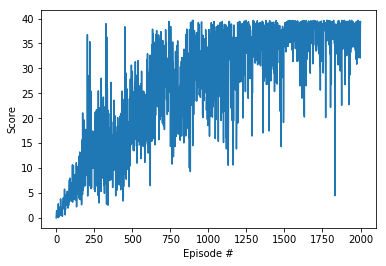

In [2]:
def ddpg(n_episodes=2000, max_t=99999):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)                      # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
            if np.mean(scores_deque) >= 30:
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 3. Agent Demo 
Load the agent and run a session in the environment.

In [3]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]
agent.reset()
score = 0

while True:
    action = agent.act(state)                      # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    agent.step(state, action, reward, next_state, done)
    state = next_state
    score += reward
    if done:
        break 
print('Total score this episode: {}'.format(score))

Total score this episode: 38.60999913699925
